In [1]:
import pandas as pd
df = pd.read_csv("datasets/table_4_14.csv", header=None)

samples = df[[0, 1]].values
labels = df[[2, 3, 4]].values

In [2]:
def get_category(d1: int, d2: int, d3: int) -> int:
    if d1 == 1 and d2 == 0 and d3 == 0:
        return 0

    if d1 == 0 and d2 == 1 and d3 == 0:
        return 1

    if d1 == 0 and d2 == 0 and d3 == 1:
        return 2

    raise Exception("Bad input")

Text(0, 0.5, 'x2')

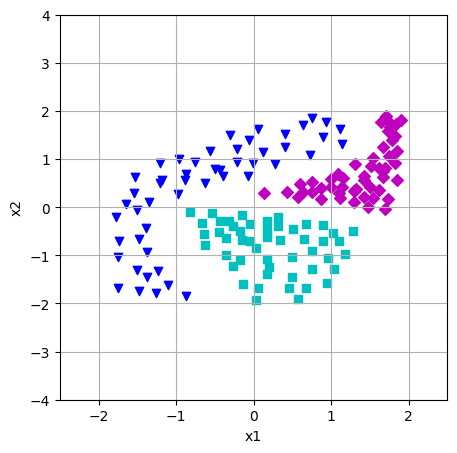

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5, 5))

color_map = np.array(["c", "m", "b"])
marker_map = np.array(["s", "D", "v"])
categories = [get_category(y[0], y[1], y[2]) for y in labels]
data_zip = zip(samples[:, 0], samples[:, 1], marker_map[categories], color_map[categories])

for x1, x2, marker, color in data_zip:
    plt.scatter(x1, x2, marker=marker, color=color)

plt.xlim(-2.5, 2.5)
plt.ylim(-4, 4)
plt.grid()

plt.xlabel("x1")
plt.ylabel("x2")

In [4]:
import quark

ff_model = quark.Model("IterativeFeedForward")

ff_sample = samples.tolist()
ff_labels = labels.tolist()

ff_l1 = quark.Layer("Gradient", 10, 2, 0.01, "Sigmoid", 1, True)
ff_l2 = quark.Layer("Gradient", 3, 20, 0.01, "Sigmoid", 1, True)
ff_model.push_layer(ff_l1)
ff_model.push_layer(ff_l2)

ff_model.fit(ff_sample, ff_labels, 4000, 0.001)

Minimum atteint: 0.006296446582405416


Text(0, 0.5, 'Mean Square Error')

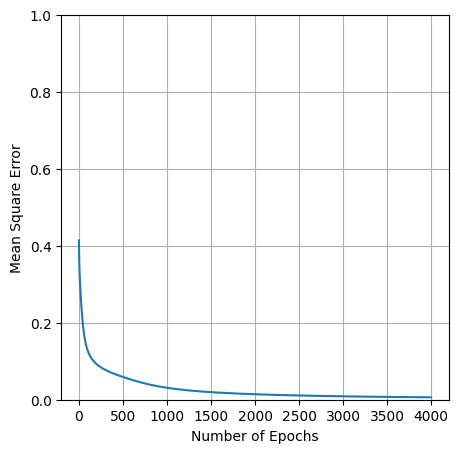

In [5]:
import matplotlib.pyplot as plt

mse = ff_model.mse
print(f"Minimum atteint: {min(mse)}")
len(mse)

plt.figure(figsize=(5, 5))
plt.plot(range(len(mse)), mse)
plt.ylim(0, 1)
plt.grid()

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")

In [8]:
def get_color(d1: int, d2: int, d3: int):
    if d1 > 0.8 and d2 < 0.2 and d3 < 0.2:
        return "c"

    if d1 < 0.2 and d2 > 0.8 and d3 < 0.2:
        return "m"

    if d1 < 0.2 and d2 < 0.2 and d3 > 0.8:
        return "b"

    else:
        return "w"

Text(0, 0.5, 'x2')

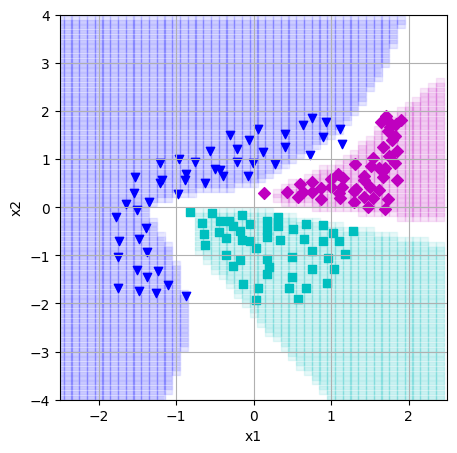

In [9]:
import matplotlib.pyplot as plt

xlim = [-2.5, 2.5]
ylim = [-4, 4]
step = 0.1

plt.figure(figsize=(5, 5))

for x in np.arange(xlim[0], xlim[1], step):
    for y in np.arange(ylim[0], ylim[1], step):
        pred = ff_model.predict([x, y])
        plt.scatter(x, y, marker="s", color=get_color(pred[0], pred[1], pred[2]), alpha= 0.1)

color_map = np.array(["c", "m", "b"])
marker_map = np.array(["s", "D", "v"])
categories = [get_category(y[0], y[1], y[2]) for y in labels]
data_zip = zip(samples[:, 0], samples[:, 1], marker_map[categories], color_map[categories])

for x1, x2, marker, color in data_zip:
    plt.scatter(x1, x2, marker=marker, color=color)

plt.xlim(-2.5, 2.5)
plt.ylim(-4, 4)
plt.grid()

plt.xlabel("x1")
plt.ylabel("x2")